In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/cars24-car-price-clean.csv')
df.head()
# #print(df.shape)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [7]:
## Univariate Linear Regression

In [8]:
X = df["model"].values
Y = df["selling_price"].values

In [9]:
def predict(x,weight):
    y_hat = weight[0] + weight[1]*x
    return y_hat

In [10]:
#Calculating error

def error(X,Y,weight):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = predict(X[i],weight)
        total_error += (y_hat - Y[i])**2    
    return (total_error/m)

In [11]:
def gradient(X,Y,weight):
    m = X.shape[0]
    # print(m)
    grad = np.zeros((2,)) #initializing gradient from 0
    # print(grad)
    for i in range(200): #iterate over all points
        x = X[i]
        y_hat = predict(x,weight)
        y = Y[i]

        grad[0] += -2*(y - y_hat) 
        grad[1] += -2*(y - y_hat)*x
        # print(x, y)
        # print(2*(y - y_hat) , -2*(y - y_hat)*x)
        # print(grad)
    return grad/m

In [12]:
def gradient_descent(X,Y, epochs=20,learning_rate =1):
    weight = np.zeros((2,))
    error_list = []
    weight_list = []
    
    for i in range(epochs):
        # Compute grad
        grad = gradient(X,Y,weight)
        # print(grad)
        e = error(X,Y,weight)
        
        #Update weights
        weight[0] = weight[0] - learning_rate*grad[0]
        weight[1] = weight[1] - learning_rate*grad[1]
        # Storing the weight values during updates
        weight_list.append((weight[0],weight[1]))
        error_list.append(e)

    return weight,error_list,weight_list

In [14]:
weight, error_list, weight_list = gradient_descent(X,Y,epochs=100)

# Weights after 800 epochs 
print(weight)

[-0.06672972  0.68488657]


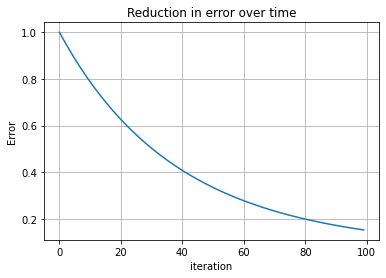

In [15]:
#How does the error changes with time?

fig = plt.figure()
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.grid()
plt.show()

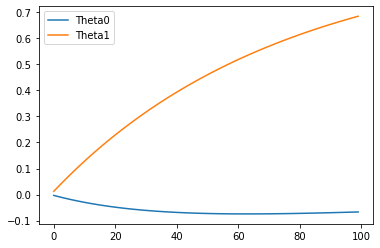

In [16]:
#How do the parameters changes during the training process?

fig = plt.figure()
ax = fig.add_subplot(111)
weight_list = np.array(weight_list)
plt.plot(weight_list[:,0],label="w0")
plt.plot(weight_list[:,1],label="w1")
plt.legend()
plt.show()

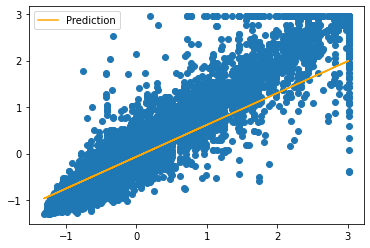

In [17]:
#Predcition of the model

fig = plt.figure()
Y_hat = predict(X,weight)
plt.scatter(X,Y)
plt.plot(X,Y_hat,color='orange',label="Prediction")
plt.legend()
plt.show()

In [80]:
# For multivariate 

X = [[66, 10, 51], [93, 18, 56], [63, 20, 91], [81, 98, 88], [26, 36, 47], [74, 43, 98], [80, 36, 26], [19, 61, 58], [69, 26, 78], [15, 61, 38], [84, 1, 95], [45, 40, 36], [79, 53, 74], [7, 90, 5], [15, 56, 83], [41, 12, 34], [72, 61, 60], [22, 82, 4], [13, 22, 59], [8, 60, 92]]
Y = [208, 291, 74, 84, 391, 436, 140, 22, 79, 471, 350, 387, 89, 48, 70, 492, 256, 314, 189, 275]
W = [0.5, 2.5, 3.1]

In [81]:
def predict_multi(x,weight):
    return np.dot(X,W)

In [82]:
predict_multi(X,W)

array([216.1, 265.1, 363.6, 558.3, 248.7, 448.3, 210.6, 341.8, 341.3,
       277.8, 339. , 234.1, 401.4, 244. , 404.8, 155.9, 374.5, 228.4,
       244.4, 439.2])

In [85]:
def cost_multi(x,y,w):

    x = np.asarray(x)
    w = np.asarray(w)
    y = np.asarray(y)

    y_hat = predict_multi(x,w)
    m = len(x)
    loss = 0

    for i in range(m):
        loss += (y[i] - y_hat[i])**2
    
    return round((loss/(2*m)),2)

cost_multi(X,Y,W)

24482.84

In [119]:
import numpy as np
import random

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, w, alpha, m, numIterations):
    x = np.asarray(x)
    y = np.asarray(y)
    w = np.asarray(w)
    
    xTrans = x.transpose()

    for i in range(0, numIterations):
        y_pred = np.dot(x, w)
        loss = y_pred - y
        gradient = np.dot(xTrans, loss) / m
        w = w - alpha * gradient
    return w


x = [[1.0, 0.0], [1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [1.0, 4.0], [1.0, 5.0], [1.0, 6.0], [1.0, 7.0], [1.0, 8.0], [1.0, 9.0]]
print(len(x))
y = [26.75, 29.12, 36.46, 32.82, 30.46, 39.7, 35.52, 39.84, 36.83, 42.74]
w = [1.0, 1.0]
m, n = np.shape(x)
print(m,n)
numIterations= 10
alpha = 0.0005
w = gradientDescent(x, y, w, alpha, m, numIterations)
print(w)

10
10 2
[1.14066562 1.63761729]
